In [ ]:
# Basic Sorting Algorithm

In [42]:
# Bubble sort
# 1. start with position 0
# 2. compare with next element 
# 3. swap it if it's small
# 4. go to ext element then compare with adjustment element
# 5. go till the end lenght-1
# 6. keep track of swap, if no swap happens then stop the loop early exit
# 7. do these for evenry element. For n element do these n-1 times or till there are no swaps
# 8. this sort start sorting elements from the end

def bubble_sort(input):
    swap = True
    while swap: #till the swap happens
        swap = False #make it flase, else it will be infinite loop
        for element in range(0, len(input)-1): #for every element in the input
            if input[element] > input[element+1]:
                swap = True # if swaps
                input[element], input[element+1] = input[element+1], input[element] # seap the elements


l = [10,0,4,4,3,2,1]
print(l)
bubble_sort(l)
print(l)
to_sort = list(randint(1,10000000000) for x in range(3))       
bubble_sort(to_sort)
to_sort

[10, 0, 4, 4, 3, 2, 1]
[0, 1, 2, 3, 4, 4, 10]


[3348853476, 6654775307, 9645133909]

In [47]:
# selection sort
# 1. start with position 0
# 2. compare with next postion, swap if it's small, go to the end
# 3. move to 1st postion, repet the step 2, move till the end
# 4. like this move on till the end-1
# 5. sorted elements from begening of the list

def selection_sort(input):
    pos = 0
    while pos < len(input):
        for loc in range(pos+1,len(input)):
            if input[pos] > input[loc]:
                input[pos], input[loc] = input[loc], input[pos]
        pos = pos+1

l = [5,3,2,1,1,4,0,100,-3]
selection_sort(l)
l

[-3, 0, 1, 1, 2, 3, 4, 5, 100]

In [51]:
# Insertion Sort
# 1. start with position x (x=1 for first loop)
# 2. compare with previous element
# 3. if position x element is small then go to innser loop
# 4. in inner loop swap the element between position x and position x-1 and keep the track of where the emelent from position x is moving
# 5. continue the loop if postition x-1 is less than postion (x-1)-1

def insertion_sort(input):
    for pos in range(1,len(input)): # start from position 1 not from 0
        if input[pos] < input[pos-1]: # check if the left elemnt is bigger
            j = pos
            while (input[j] < input[j-1] and j > 0):# loop for left side
                input[j-1],input[j] = input[j], input[j-1]
                j-=1

            
l = [0,1,4,3,2]
insertion_sort(l)
l


[0, 1, 2, 3, 4]

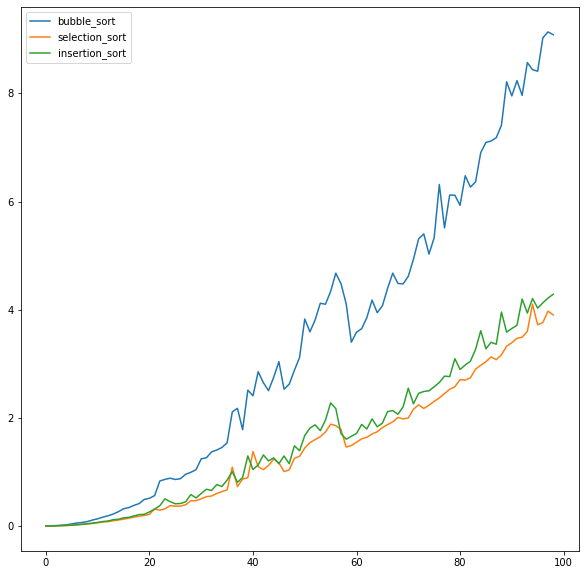

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time
from random import random, randint

# Running speed test
bubble_sort_time = []
selection_sort_time = []
insertion_sort_time = []

sizes = [100*i for i in range(1,100)] 
for size in sizes:
    to_sort = list(randint(1,10000000000) for x in range(size))
    to_sort_1 = to_sort.copy()
    to_sort_2 = to_sort.copy()
    to_sort_3 = to_sort.copy()
    
    start_time = time()
    bubble_sort(to_sort_1)
    bubble_sort_time.append(time() - start_time)
    
    start_time = time()
    selection_sort(to_sort_2)
    selection_sort_time.append(time() - start_time)
    
    start_time = time()
    insertion_sort(to_sort_3)
    insertion_sort_time.append(time() - start_time)

plt.figure(figsize=(10,10))
l1 = plt.plot(bubble_sort_time)
l2 = plt.plot(selection_sort_time)
l3 = plt.plot(insertion_sort_time)
plt.legend(['bubble_sort', 'selection_sort', 'insertion_sort'])

In [53]:
# merge sort
def merge_sorted(arr1, arr2):
    sorted_arr = []
    i,j = 0,0
    while (i < len(arr1) and j < len(arr2)):        
        if arr1[i] < arr2[j]:
            sorted_arr.append(arr1[i])
            i += 1
        else:
            sorted_arr.append(arr2[j])
            j += 1            
    # add rest of the elements
    if i == len(arr1):#arr1 done, pick all the remaning elements from arr2
        sorted_arr.extend(arr2[j:])
    else:
        sorted_arr.extend(arr1[i:])
    return sorted_arr

def devide(input):
    if len(input) <= 1: # already sorted
        return input[:]
    else:
        mid = len(input)//2
        l1 = devide(input[:mid])
        l2 = devide(input[mid:])
        return merge_sorted(l1,l2)


l1 = [2,3,4,6,8,2]
l2 = [1,9,2,3,5,7]
# l = list(range(1,100000000))

print(devide(l2))
# print(merge_sorted(l1,l2))

[1, 2, 3, 5, 7, 9]


In [ ]:
# Qucick Sort, using seperate array for holding left, middle and right array
# using random selection of pivot
from random import randint
def quick_sort(input):
    left, mid, right = [],[],[]
    if len(input) <= 1:
        return input
    else:
        pivot = input[randint(0,len(input)-1)]
        for element in input:
            if element < pivot:
                left.append(element)
            if element == pivot:
                mid.append(element)
            if element > pivot:
                right.append(element)
        return quick_sort(left)+mid+quick_sort(right)


l1 = [2,3,4,6,8,2]
l2 = [1,9,2,3,5,7]
l = list(range(1,100000000))

print(quick_sort(l))

In [42]:
# quick sort inplace
def quick_sort_inplace(arr):
    if len(arr) <= 1: # only 1 element, return it
        return arr
    else:        
        pivot = arr[-1] #consider last element as pivot
        i,j = 0,0 #set the counter
        while i < len(arr)-1: # iterated through entire list till pivot
            if arr[i] > pivot: # if the ith element is gratter than pivot, move on
                i = i+1
            else: # else swap and move both i and j
                arr[i],arr[j] = arr[j], arr[i]
                i,j = i+1, j+1
        arr[j],arr[-1] = arr[-1], arr[j] # after the loop swap pivot element with jth element
    # till j it's less thank j, j is middle and after j it's more than j
    return quick_sort_inplace(arr[:j])+[arr[j]]+quick_sort_inplace(arr[j+1:])
    
l = [10,7,12,8,3,2,6]
l1 = [11,1,2,3,4,5,6,10,7,6,5,4,3,2,1,0,8,9,10]
l2 = [1,2,3,4,5,6]
print(quick_sort_inplace(l))

[2, 3, 6, 7, 8, 10, 12]


In [15]:
import time

def recur_countdown_timer(n):
    if n == 0:
        return n
    else:
        print(n)
        time.sleep(1)
        return recur_countdown_timer(n-1)

def iter_countdown_timer(n):
    while n > 0:
        print(n)
        time.sleep(1)
        n -= 1
    print(n)

z = 5
print(f"Counting down from {z}:")
# iter_countdown_timer(z)
print(recur_countdown_timer(z))

import sys
sys.setrecursionlimit(1500)
def fact(n):
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

# fact(1400)

def feb (n):
    if n == 0:
        return n
    if n == 1:
        return n
    else:
        return feb(n-1)+feb(n-2)
        
feb(10)   

Counting down from 5:
5
4
3
2
1
0


55

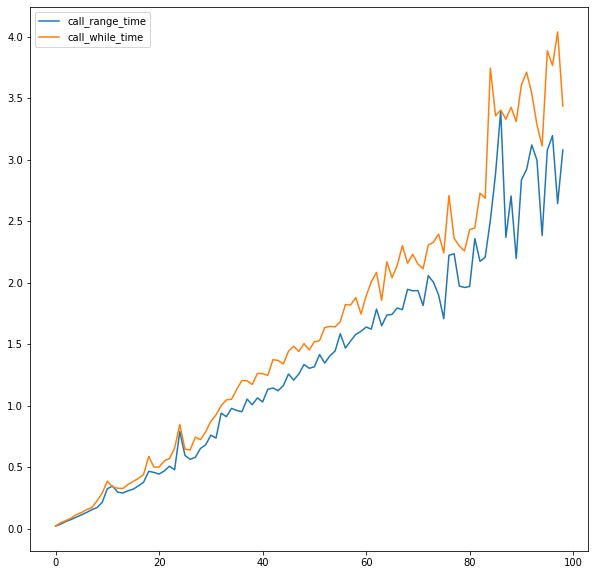

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time

def call_range(length):
    for x in range(0,length):
        x**2
        
def call_while(length):
    x = 0
    while x <= length:
        x**2
        x += 1
# Running speed test
call_range_time = []
call_while_time = []
# insertion_sort_time = []

sizes = [100000*i for i in range(1,100)] 
for size in sizes:
    start_time = time()
    call_range(size)
    call_range_time.append(time() - start_time)
    
    start_time = time()
    call_while(size)
    call_while_time.append(time() - start_time)

plt.figure(figsize=(10,10))
l1 = plt.plot(call_range_time)
l2 = plt.plot(call_while_time)

plt.legend(['call_range_time', 'call_while_time'])
        
        